# Load the data

You can download CIFAR10 dataset from official site:

https://www.cs.toronto.edu/~kriz/cifar.html

or do it using Pytorch:
https://pytorch.org/vision/stable/datasets.html#cifar

or another framework.



In [4]:
# Put your code here
import torch
import torchvision
import numpy as np

dataset = torchvision.datasets.CIFAR10('cifar10/', download=True)
data = dataset.data
targets = np.array(dataset.targets)

classes = ['Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

100%|██████████| 170498071/170498071 [00:10<00:00, 15751286.87it/s]


Extracting cifar10/cifar-10-python.tar.gz to cifar10/


## Split data into train and validation parts

Extract subset containing train and validation parts.
Part must contain 5000 and 500 samples respectively.

In [5]:
# Put your code here


# Train data 5000 samples
X_train = data[:5000]
y_train = targets[:5000]

# Validation data 500 samples
X_val = data[5000:5500]
y_val = targets[5000:5500]

## Dispaly some images  along with it class names
  


Лягушка


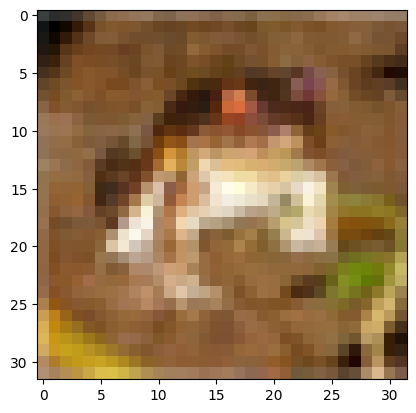

Грузовик


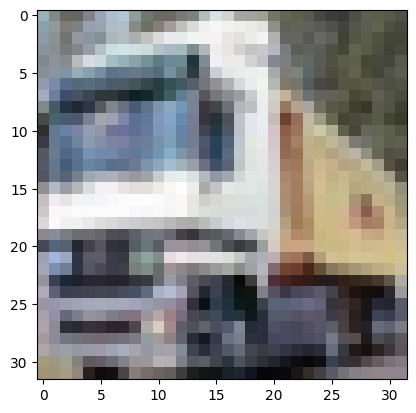

Грузовик


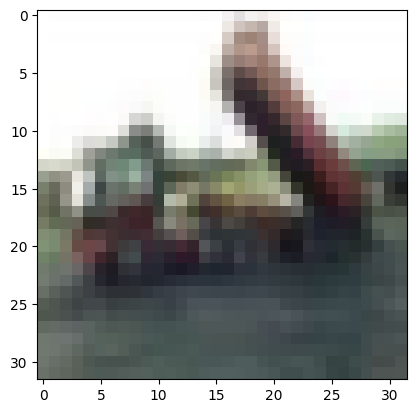

Олень


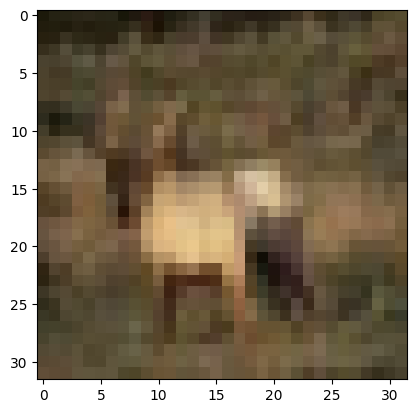

Автомобиль


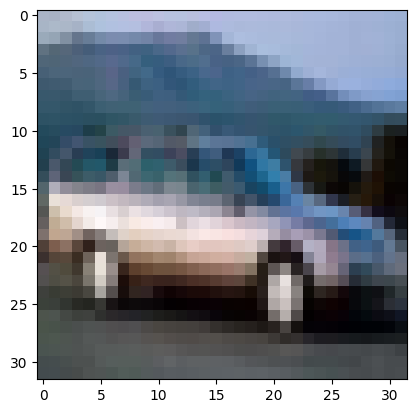

In [7]:
# Put your code here
import matplotlib.pyplot as plt

for i in range(5):
    print(classes[y_train[i]])

    plt.imshow(X_train[i])
    plt.show()

# Implement NearestNeighbor class

In [8]:
class NearestNeighbor:
  def __init__(self): # You can change the method signature
    self.k = 1

  def fit(self,x,y): # You can change the method signature
    """
      Arguments:
        x  (Tensor or numpy.array): collection of objects from testset (batch)
        y  (Tensor or numpy.array): collection of integer
        representing a class number for objects from x

    """
    x = x.dot([0.07, 0.72, 0.21]) # to black-white
    self.candidates = x
    self.classes = y

  def predict(self,x):
    """
      Arguments:
          x  (Tensor or numpy.array): collection of objects from testset (batch)

      Returns:
          class_num (Tensor or numpy.array) - collection of integer representing
          class numbers for objects from x
    """

    # ... Put you code here
    x = x.dot([0.07, 0.72, 0.21]) # to black-white
    labels = []
    for im in x:
      difs = (np.abs(self.candidates - im)).sum(axis=(1,2))
      p = difs.argsort()
      final_classes = self.classes[p][:self.k]
      label = np.argmax(np.bincount(final_classes))
      labels.append(label)

    return labels

##Perform smoke test

- Create model instance
- get predictions for dozen of samples


In [9]:
model = NearestNeighbor()
# Put your code here if need
model.fit(X_train, y_train)
predicted_labels = model.predict(X_val[0:9])
for i, label in enumerate(predicted_labels):
  print(classes[label],"vs",classes[y_val[i]])

Лошадь vs Лягушка
Лошадь vs Лошадь
Грузовик vs Грузовик
Корабль vs Самолет
Лягушка vs Собака
Лягушка vs Птица
Олень vs Кошка
Собака vs Кошка
Кошка vs Кошка


# Validate your model

## Create validation function

Must calculate Accuracy metric for your model.

In [10]:
from sklearn.metrics import accuracy_score

def validate(model,x, y):
  """
      Arguments:
          model (Object): instance of NearestNeighbor class
          x (Tensor or numpy.array): collection of objects
          y (Tensor or numpy.array): collection of integer representing
          class numbers for objects from x

      Returns:
          accuracy (float) : percentage of correctly classified objects
    """

  # ... Put you code here
  accuracy = accuracy_score(y, model.predict(x))
  return accuracy

 ## Calculate model accuracy on validation data

In [11]:
accuracy = validate(model, X_val, y_val)
print("Accuracy {:.3f}".format(accuracy))

Accuracy 0.236


# Place for brief conclusion
Feel free to describe troubles here.


В целом, точность 23.6% лучше, чем случайная /approx 10% :)



# Ideas for extra work

- Implenment K-NearestNeighbor
- Test different distance functions
- Find hyperparams using Cross-Validation
- Plot accuracy curve against K
- Evaluate time  